In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [59]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/refs/heads/master/8_sgd_vs_gd/homeprices_banglore.csv')

In [60]:
df.sample(4)

,area,bedrooms,price
15,1175,2,42.00
0,1056,2,39.07
17,1540,3,60.00
2,1440,3,62.00


In [61]:
X,y = df.drop(columns='price') , df['price']

In [62]:
from sklearn.preprocessing import MinMaxScaler
st = MinMaxScaler()
X_scaled = st.fit_transform(X)
y_scaled = st.fit_transform(y.to_frame())
y_scaled = y_scaled.reshape(-1)

In [63]:
len(X_scaled)

20

In [64]:
indices = np.random.choice(len(X_scaled) , size = 1 , replace=False)
indices

array([14])

In [65]:
def mini_batch_gradient_descent(X_train,y_train,epoch,lr=0.01):
    epochs,cost = [],[]
    n_samples , n_features = X_train.shape
    w = np.zeros(n_features)
    b = 0
    for _ in range(epoch):
        indices = np.random.choice(len(X_train), size=10, replace=False)
        X_sample = X_train[indices]
        y_sample = y_train[indices]
        
        y_pred = np.dot(X_sample , w) + b
        
        dw = -1/len(X_sample) * np.dot(X_sample.T , (y_sample-y_pred))
        db = -1/len(X_sample) * np.sum(y_sample-y_pred)

        w -= lr*dw
        b -= lr*db

        cost_function = np.mean(np.square(y_pred-y_sample))
        epochs.append(_)
        cost.append(cost_function)
        
    return w,b,epochs,cost

In [66]:
w,b,epochs,cost=mini_batch_gradient_descent(X_scaled,y_scaled,100)

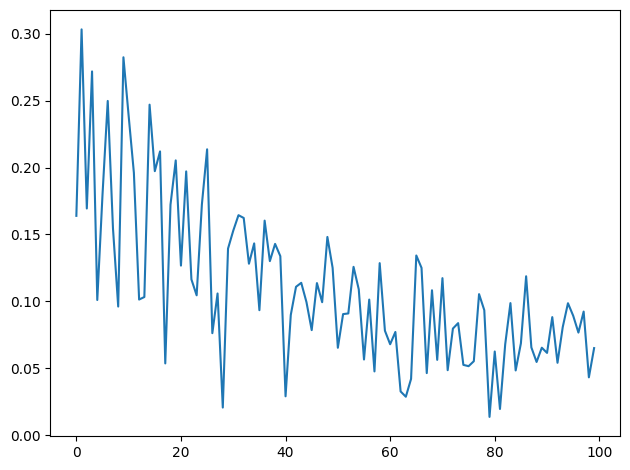

In [67]:
plt.plot(epochs,cost)
plt.tight_layout()

In [68]:
cost[-1]

0.06515082875254602